In [73]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [21]:
import_data = nfl.import_seasonal_data([2022])   
import_data.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [22]:
qb_season_data = pd.DataFrame(index = import_data.index)
qb_season_data["Player ID"] = import_data["player_id"]
qb_season_data["Completions"] = import_data["completions"]
qb_season_data["Attempts"] = import_data["attempts"]
qb_season_data["Passing Yards"] = import_data["passing_yards"]
qb_season_data["Passing TDs"] = import_data["passing_tds"]
qb_season_data["Interceptions"] = import_data["interceptions"]
qb_season_data["Sacked"] = import_data["sacks"]
qb_season_data["Sack Yards"] = import_data["sack_yards"]
qb_season_data["Sack Fumbles"] = import_data["sack_fumbles"]
qb_season_data["Sack Fumbles Lost"] = import_data["sack_fumbles_lost"]
qb_season_data["Air Yards"] = import_data["passing_air_yards"]
qb_season_data["Passing YAC"] = import_data["passing_yards_after_catch"]
qb_season_data["Passing First Downs"] = import_data["passing_first_downs"]
qb_season_data["Passing EPA"] = import_data["passing_epa"]
qb_season_data["2Pt Conversions"] = import_data["passing_2pt_conversions"]
qb_season_data["PACR"] = import_data["pacr"]
qb_season_data["Games Played"] = import_data["games"]

In [30]:
import_weekly_data = nfl.import_weekly_data([2022])             
qb_data = pd.DataFrame(index = import_weekly_data.index)
qb_data["Player"] = import_weekly_data["player_name"]
qb_data["Player ID"] = import_weekly_data["player_id"]
qb_data["Team"] = import_weekly_data["recent_team"]
qb_data["Player Full Name"] = import_weekly_data["player_display_name"]
qb_data = qb_data.drop_duplicates(subset=['Player Full Name'])
qb_data.loc[qb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [35]:
qb_merged_season_data = qb_data.merge(qb_season_data, left_on='Player ID', right_on='Player ID')
qb_merged_season_data = qb_merged_season_data.loc[qb_merged_season_data["Attempts"] > 20, :]
qb_merged_season_data = qb_merged_season_data.drop(columns=["Player ID"])
qb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Completions,Attempts,Passing Yards,Passing TDs,Interceptions,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
192,K.Murray,ARI,Kyler Murray,53,83,470.0,3,1.0,3.0,25.0,0,0,493.0,273.0,24.0,-8.672059,2,1.911918,2
59,M.Mariota,ATL,Marcus Mariota,37,59,411.0,2,2.0,3.0,25.0,1,1,487.0,160.0,19.0,2.301114,1,1.718509,2
166,L.Jackson,BAL,Lamar Jackson,38,59,531.0,6,1.0,2.0,2.0,0,0,674.0,212.0,21.0,22.070181,0,1.604406,2
175,J.Allen,BUF,Josh Allen,26,31,297.0,3,2.0,2.0,5.0,0,0,227.0,114.0,15.0,13.646458,0,1.308370,1
174,B.Mayfield,CAR,Baker Mayfield,30,56,380.0,2,1.0,6.0,44.0,2,0,389.0,210.0,14.0,-9.317367,0,2.060339,2
314,J.Fields,CHI,Justin Fields,15,28,191.0,2,2.0,5.0,38.0,0,0,283.0,100.0,6.0,-8.119776,0,1.325426,2
279,J.Burrow,CIN,Joe Burrow,57,89,537.0,3,4.0,13.0,73.0,3,1,558.0,300.0,35.0,-17.301795,2,1.936828,2
84,J.Brissett,CLE,Jacoby Brissett,40,61,376.0,2,1.0,2.0,17.0,0,0,377.0,194.0,22.0,6.515705,0,2.367936,2
78,D.Prescott,DAL,Dak Prescott,14,29,134.0,0,1.0,2.0,13.0,0,0,202.0,56.0,6.0,-12.482925,0,0.663366,1
106,C.Rush,DAL,Cooper Rush,26,44,299.0,1,0.0,3.0,17.0,0,0,333.0,129.0,13.0,0.692172,0,1.733128,2


In [38]:
qb_data_ngs = pd.read_csv("../Resources/ngs_2022_passing.csv")
qb_data_ngs = qb_data_ngs.loc[qb_data_ngs["week"] == 0, :]
qb_data_ngs = qb_data_ngs.sort_values(by=['team_abbr'])
qb_data_full = qb_data_ngs.merge(qb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
qb_data_full = qb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", 
                                            "player_jersey_number", "Player", "Team", "Player Full Name", "Completions",
                                           "Attempts", "Passing Yards", "Passing TDs", "Interceptions", "week"])
qb_data_full.columns

Index(['week', 'player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played'],
      dtype='object')

In [39]:
qb_data_full

,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,...,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
0,0,Kyler Murray,QB,ARI,2.702024,3.646038,6.230253,-2.584215,15.662651,38.988774,...,25.0,0,0,493.0,273.0,24.0,-8.672059,2,1.911918,2
1,0,Marcus Mariota,QB,ATL,2.938724,6.489459,8.234561,-1.745102,10.169492,30.052887,...,25.0,1,1,487.0,160.0,19.0,2.301114,1,1.718509,2
2,0,Lamar Jackson,QB,BAL,2.849407,8.312105,11.699655,-3.387550,16.949153,58.484966,...,2.0,0,0,674.0,212.0,21.0,22.070181,0,1.604406,2
3,0,Josh Allen,QB,BUF,2.474419,6.690385,7.107419,-0.417035,9.677419,55.192900,...,5.0,0,0,227.0,114.0,15.0,13.646458,0,1.308370,1
4,0,Baker Mayfield,QB,CAR,2.737643,5.891667,7.229245,-1.337579,12.500000,54.658197,...,44.0,2,0,389.0,210.0,14.0,-9.317367,0,2.060339,2
5,0,Justin Fields,QB,CHI,3.259679,5.538000,10.130714,-4.592714,0.000000,40.817379,...,38.0,0,0,283.0,100.0,6.0,-8.119776,0,1.325426,2
6,0,Joe Burrow,QB,CIN,2.576382,4.465789,6.890227,-2.424438,14.606742,33.879293,...,73.0,3,1,558.0,300.0,35.0,-17.301795,2,1.936828,2
7,0,Jacoby Brissett,QB,CLE,2.899051,5.051250,7.064386,-2.013136,21.311475,32.159036,...,17.0,0,0,377.0,194.0,22.0,6.515705,0,2.367936,2
8,0,Dak Prescott,QB,DAL,2.720966,5.637143,7.434828,-1.797685,24.137931,33.480473,...,13.0,0,0,202.0,56.0,6.0,-12.482925,0,0.663366,1
9,0,Cooper Rush,QB,DAL,2.416837,6.521538,7.948333,-1.426795,15.909091,35.920001,...,17.0,0,0,333.0,129.0,13.0,0.692172,0,1.733128,2


In [40]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

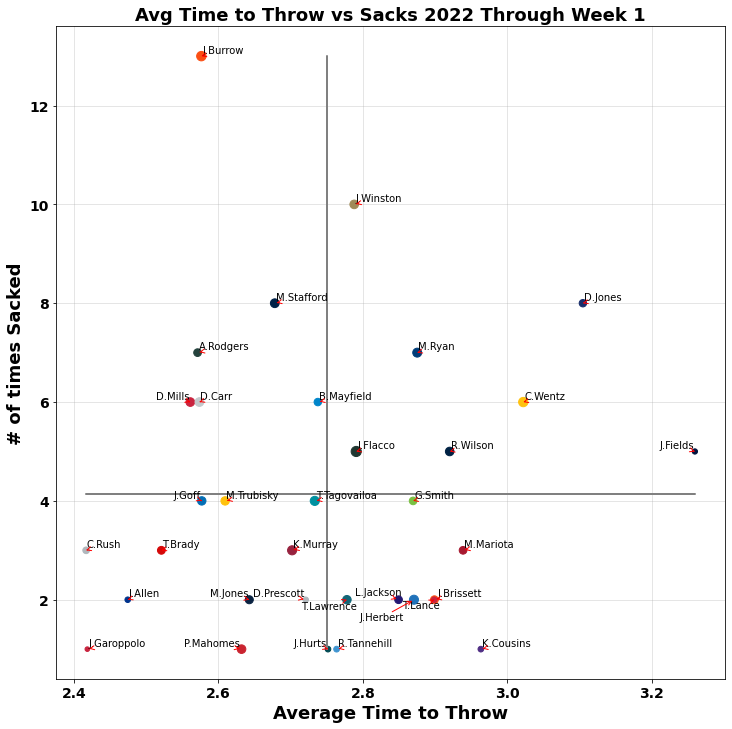

In [64]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Sacked", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('# of times Sacked', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Sacks 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_Sacks.png', dpi=400)
plt.show()

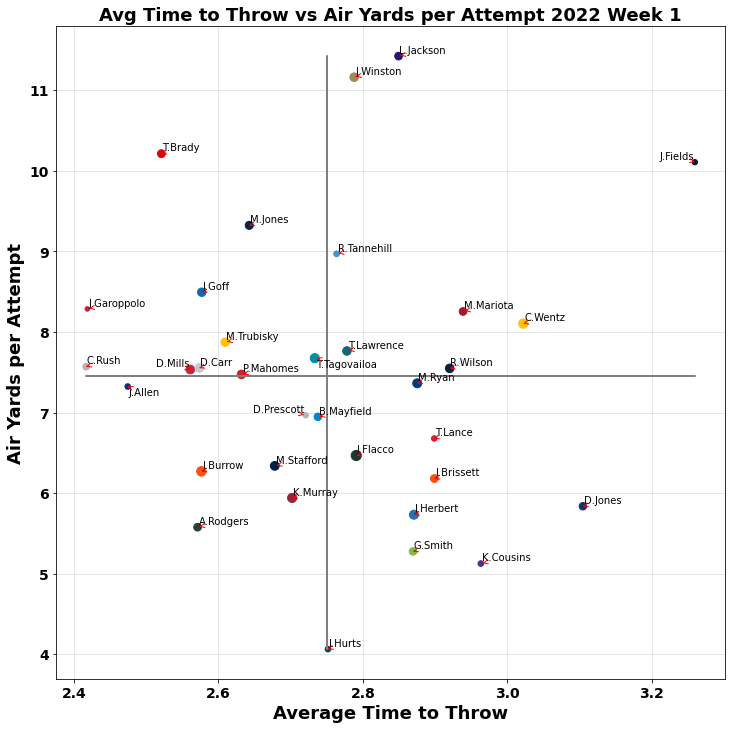

In [66]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Air Yards", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('Air Yards per Attempt', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Air Yards per Attempt 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_AirYardsAttempt.png', dpi=400)
plt.show()

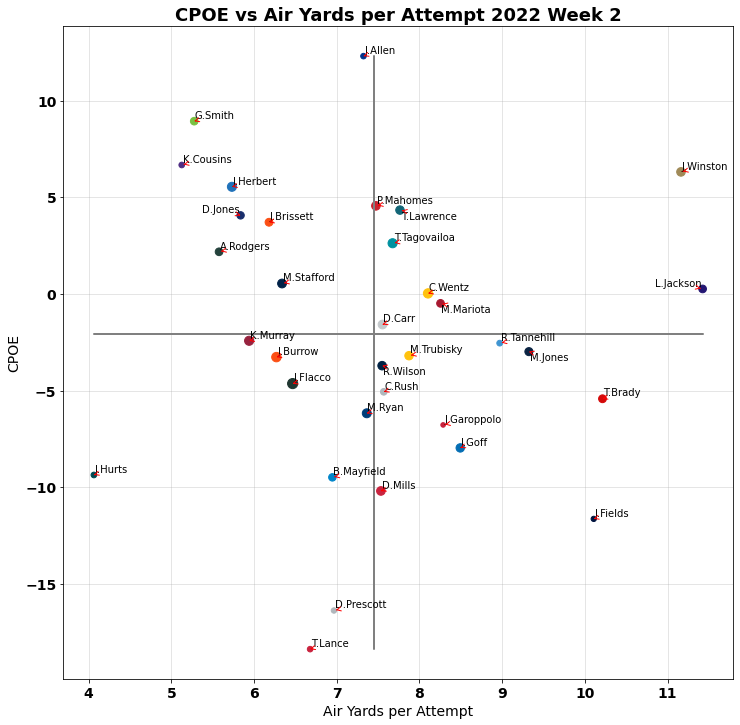

In [68]:
qb_graph = qb_data_full[["player_short_name", "completion_percentage_above_expectation", "Air Yards", "team_abbr", "attempts"]]

y = qb_graph["completion_percentage_above_expectation"]
x = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.ylabel('CPOE', fontsize=14)
plt.xlabel('Air Yards per Attempt', fontsize=14)
plt.title('CPOE vs Air Yards per Attempt 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AirYardsAttempt_vs_CPOE.png', dpi=400)
plt.show()

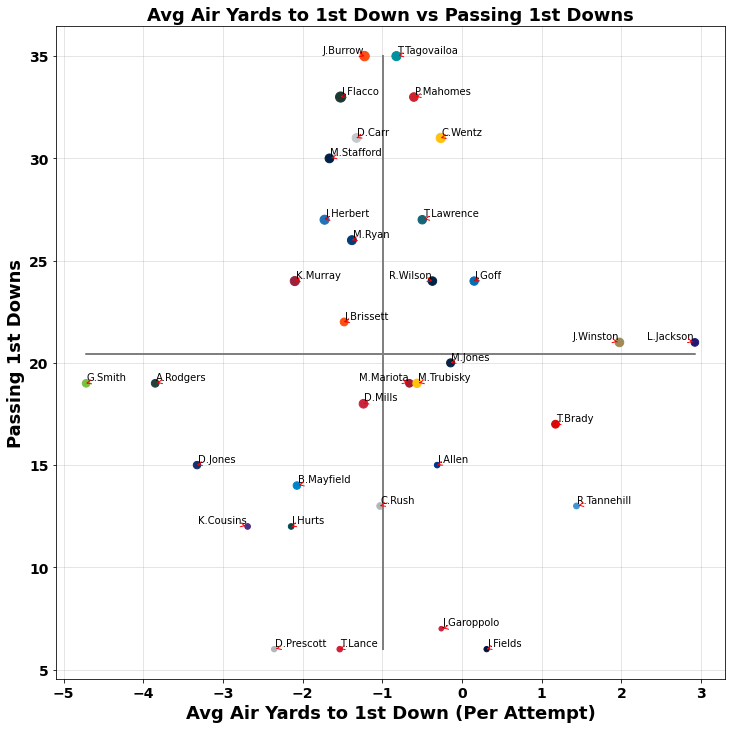

In [69]:
qb_graph = qb_data_full[["player_short_name", "avg_air_yards_to_sticks", "Passing First Downs", "team_abbr", "attempts"]]

x = qb_graph["avg_air_yards_to_sticks"]
y = qb_graph["Passing First Downs"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Air Yards to 1st Down (Per Attempt)', fontsize=18, fontweight = "bold")
plt.ylabel('Passing 1st Downs', fontsize=18, fontweight = "bold")
plt.title('Avg Air Yards to 1st Down vs Passing 1st Downs through through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

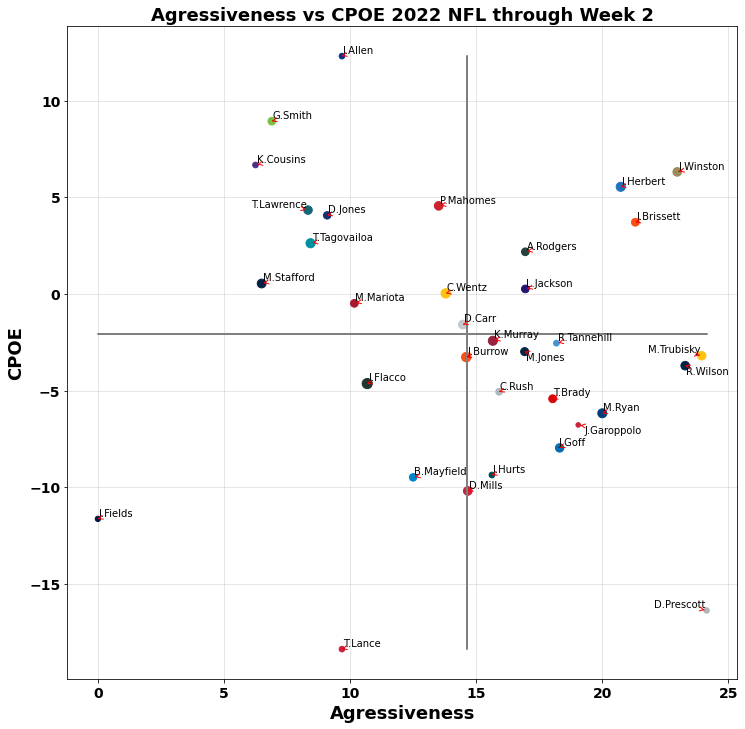

In [72]:
qb_graph = qb_data_full[["player_short_name", "aggressiveness", "completion_percentage_above_expectation", "team_abbr",
                         "attempts"]]

x = qb_graph["aggressiveness"]
y = qb_graph["completion_percentage_above_expectation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Agressiveness', fontsize=18, fontweight = "bold")
plt.ylabel('CPOE', fontsize=18, fontweight = "bold")
plt.title('Agressiveness vs CPOE 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

In [84]:
qb_data_pfr = pd.read_csv("../Resources/advstats_season_pass.csv")
qb_data_pfr = qb_data_pfr.loc[qb_data_pfr["season"] == 2022, :]
qb_data_pfr = qb_data_pfr.drop(columns=["team", "pass_attempts", "season", "pfr_id"])
qb_data_all = qb_data_full.merge(qb_data_pfr, left_on='player_display_name', right_on='player')
qb_data_all.columns

Index(['week', 'player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played', 'player', 'throwaways', 'spikes', 'drops',
       'drop_pct', 'bad_throws', 'bad_throw_pct', 'pocket_time',
       'times_blitzed', 'times_hurried', 'times_hit', 'times_pressured',
       'pressure_pct', 'batted_balls', 'on_tgt_t

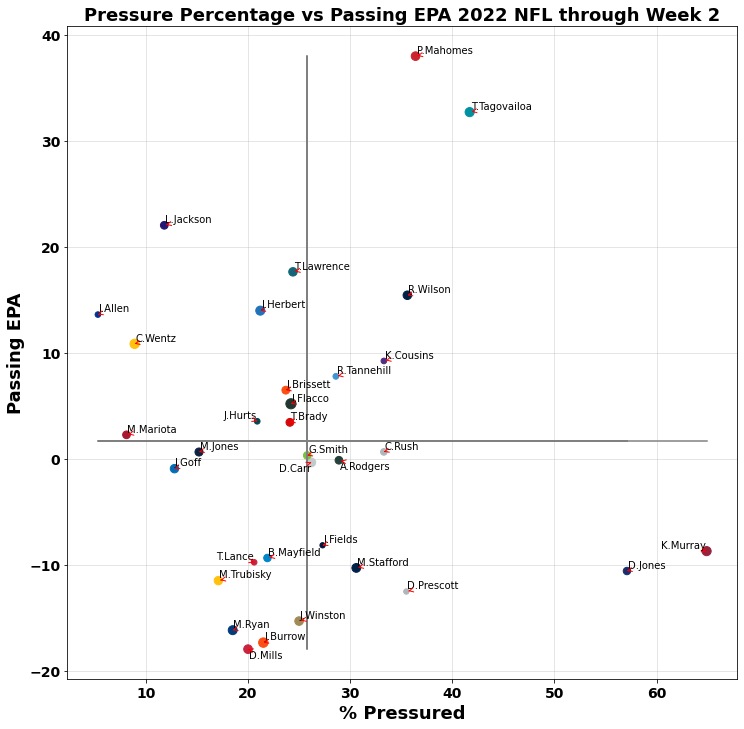

In [89]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "Passing EPA", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["Passing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Passing EPA', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Passing EPA 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

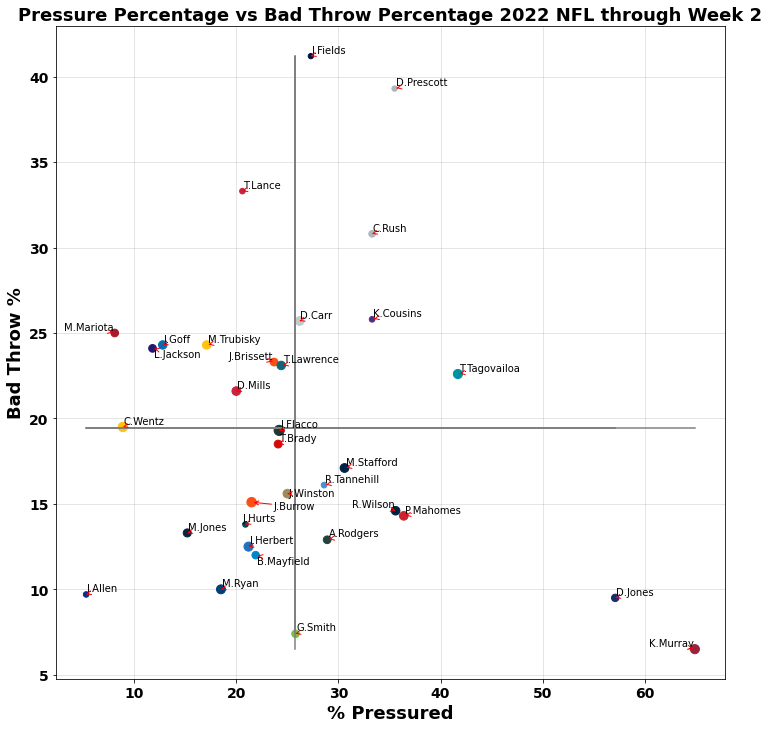

In [85]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "bad_throw_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["bad_throw_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Bad Throw %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Bad Throw Percentage 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

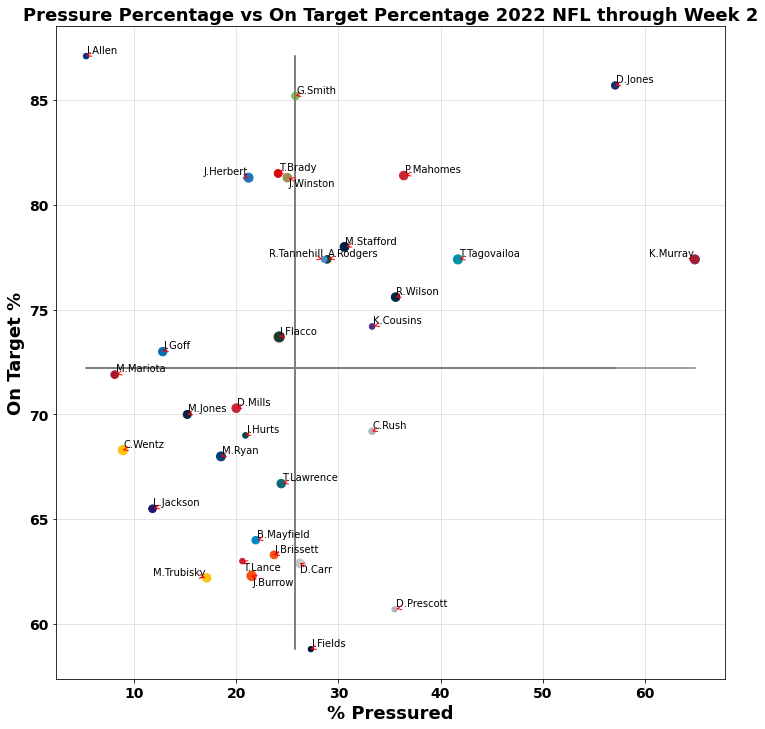

In [87]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "on_tgt_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["on_tgt_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('On Target %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs On Target Percentage 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

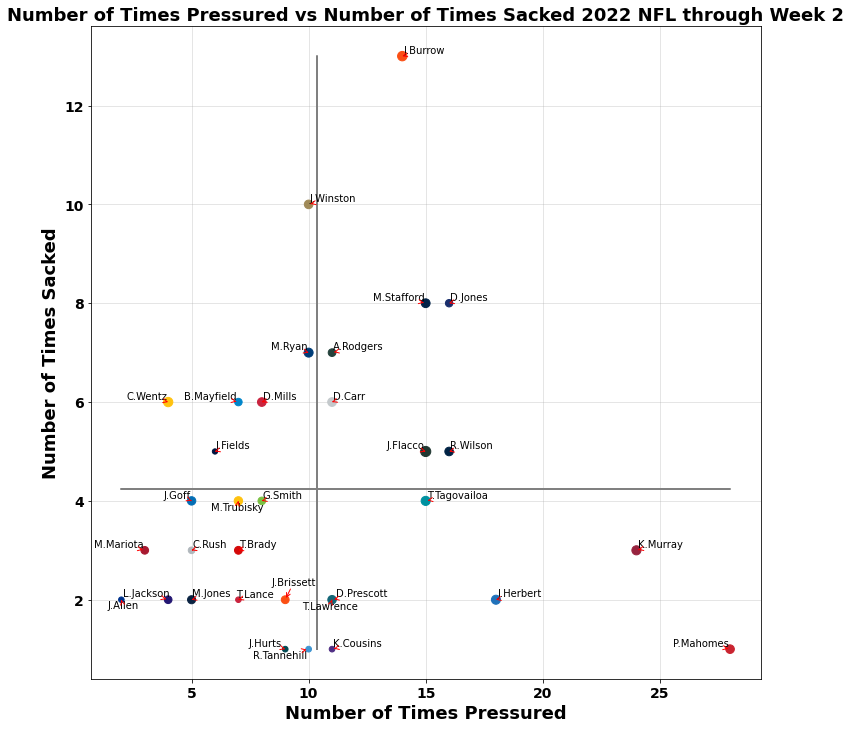

In [90]:
qb_graph = qb_data_all[["player_short_name", "times_pressured", "Sacked", "team_abbr",
                         "attempts"]]

x = qb_graph["times_pressured"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Number of Times Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Number of Times Sacked', fontsize=18, fontweight = "bold")
plt.title('Number of Times Pressured vs Number of Times Sacked 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

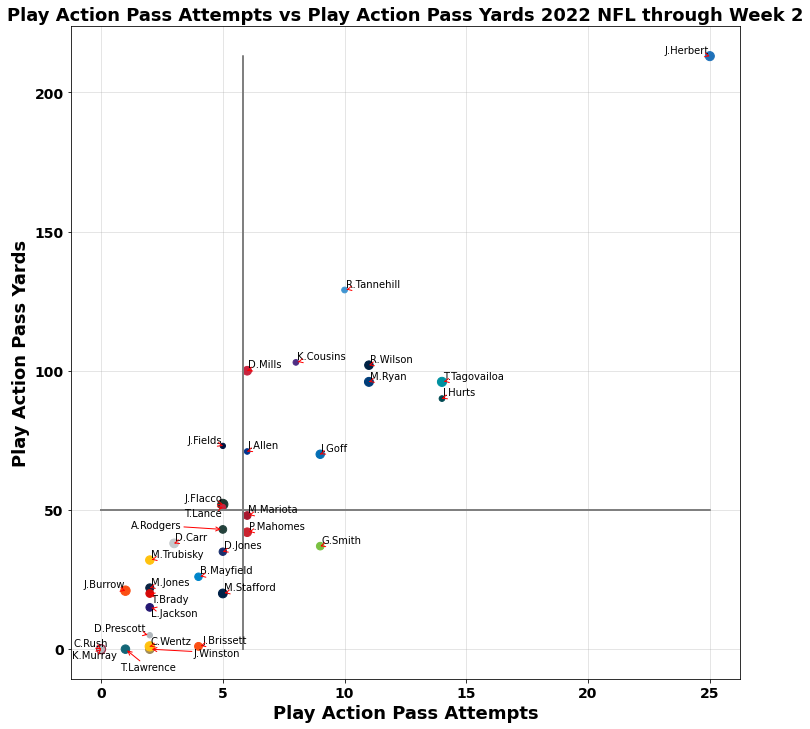

In [88]:
qb_graph = qb_data_all[["player_short_name", "pa_pass_att", "pa_pass_yards", "team_abbr",
                         "attempts"]]

x = qb_graph["pa_pass_att"]
y = qb_graph["pa_pass_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Play Action Pass Attempts', fontsize=18, fontweight = "bold")
plt.ylabel('Play Action Pass Yards', fontsize=18, fontweight = "bold")
plt.title('Play Action Pass Attempts vs Play Action Pass Yards 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()